# Assignment Recap

## Data Science Competition: Build an end-to-end regression model
This in-class competition will allow you to practice the entire machine-learning pipeline, from data loading to model selection. You will work individually and as a team, applying your data science skills to build regression models and share insights.

**Dataset Release**
- The dataset will be shared on Wednesday, April 16, at 4 PM.

**Part 1: Individual Session (4:00 – 5:15 PM)**
Each student will:
- Work independently to build an end-to-end regression model.
- Submit individual work by 5:15 PM.

You will go through the full pipeline:
- Load the dataset
- Perform Exploratory Data Analysis (EDA)
    - Note: Outlier analysis is NOT required for this competition.
- Build, cross-validation, model tune and evaluate at least three regression models
- Select and justify the best model

**Part 2: Team Session (5:15 – 6:00 PM)**
Each team will:
- Consolidate individual findings
- Create a one-slide summary in PowerPoint (include EDA insights and modeling results)

Important Note:
- You are allowed to use any resources online except AI tools.
- The team with the lowest RMSE (with a valid model) will receive a bonus of 10 points credit for the Final Presentation and Reporting
 
## Things to know in Python/R
- How to load a CSV file?
- How do we perform EDA for this data set?
    - Identify basic properties of the data set (i.e., size, data types,…)
    - Descriptive analysis
    - Visualize and analyze the data to identify trends, correlations, and potential outliers.
    - Apply transformation to the response variable if needed
    - Provide meaningful insights from the data
    - Outlier analysis is not required
- How to develop Regression Models
    - Using the preprocessed data, build at least three regression models to predict Response Variable. Ensure proper application of:
    - Train/Test Split
        - IMPORTANT: Perform the train-test split with 70-30 and use the random state as 123. (this is to make all students use the same train and test data for easy comparison)
        - X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
- Apply Cross-Validation
- Apply Hyperparameter Tuning
- Model Evaluation and Recommendation
    - Evaluate models using appropriate performance metrics
    - Recommend the best-performing model with justification.

In [54]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [27]:
# Read data set(s)
dataSet = pd.read_csv('C:/Users/joell/Downloads/dsci_power_outage_data.csv')

In [28]:
# Data Features 
print("Shape:\t\t", dataSet.shape)
print("Features:\t", dataSet.columns)
print("\nHead:")
print(dataSet.head())
print("\nTail:")
print(dataSet.tail())
print("\nMissing Data Summary:")
print(dataSet.isna().sum())

Shape:		 (5385, 7)
Features:	 Index(['Delay_Hours', 'Month', 'System Voltage', 'Consumer_Effected',
       'System_Load (kW)', 'Failure_Code', 'Location'],
      dtype='object')

Head:
   Delay_Hours    Month System Voltage  Consumer_Effected  System_Load (kW)  \
0         0.10  January           33kV               9555           23290.0   
1         0.42  January             LV                282              98.0   
2         0.50  January           11kV                291             104.0   
3         0.08  January           11kV               4192           13025.0   
4         0.15  January           11kV                755             807.0   

  Failure_Code    Location  
0           A1  Location 1  
1           D1  Location 2  
2           C1  Location 3  
3           C1  Location 2  
4           C1  Location 4  

Tail:
      Delay_Hours     Month System Voltage  Consumer_Effected  \
5380         0.02  December           33kV              12368   
5381         0.02  December  

In [29]:
# Take the easy route and just drop all NANs for now
dataSet = dataSet.dropna()

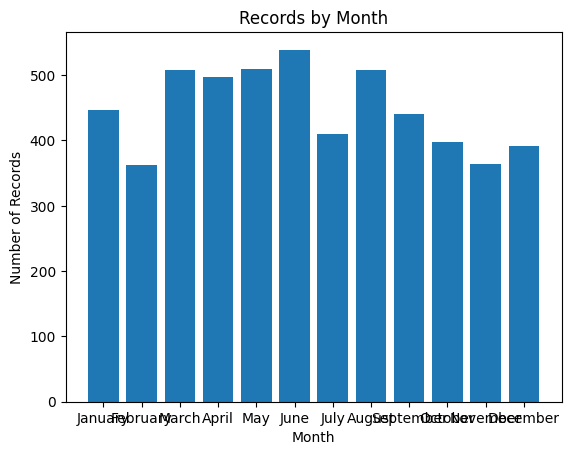

In [30]:
# Looking into number of records by month
monthCount = pd.DataFrame({"Month": [], "Count": []})

monthCount['Month'] = dataSet['Month']
monthCount['Count'] = dataSet.groupby('Month')['Month'].transform('count')

monthCount = monthCount.drop_duplicates()

plt.bar(monthCount['Month'], monthCount['Count'])
plt.title('Records by Month')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.show()

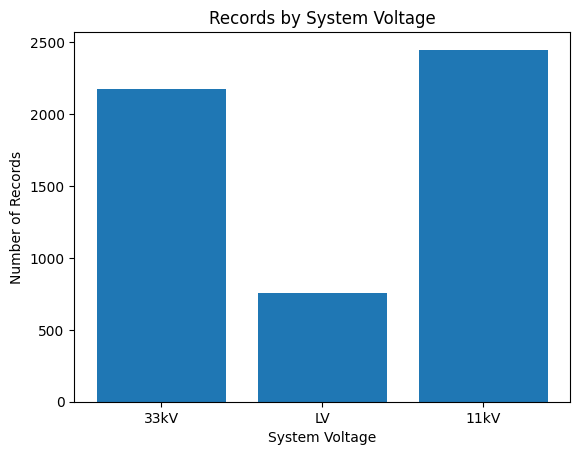

In [31]:
# Looking into number of records by voltage
voltageCount = pd.DataFrame({"System Voltage": [], "Count": []})

voltageCount['System Voltage'] = dataSet['System Voltage']
voltageCount['Count'] = dataSet.groupby('System Voltage')['System Voltage'].transform('count')

voltageCount = voltageCount.drop_duplicates()

plt.bar(voltageCount['System Voltage'], voltageCount['Count'])
plt.title('Records by System Voltage')
plt.xlabel('System Voltage')
plt.ylabel('Number of Records')
plt.show()

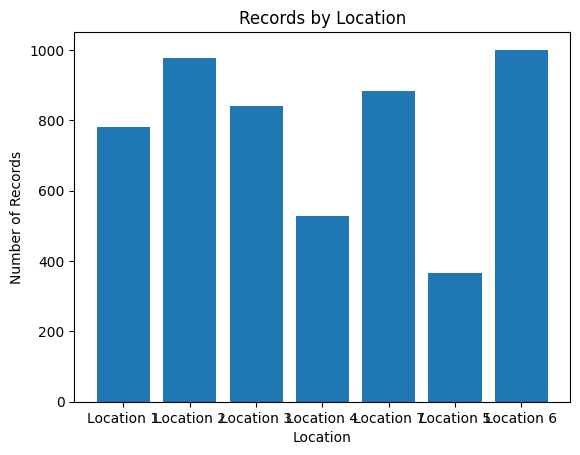

In [32]:
# Looking into number of records by location
locationCount = pd.DataFrame({"Location": [], "Count": []})

locationCount['Location'] = dataSet['Location']
locationCount['Count'] = dataSet.groupby('Location')['Location'].transform('count')

locationCount = locationCount.drop_duplicates()

plt.bar(locationCount['Location'], locationCount['Count'])
plt.title('Records by Location')
plt.xlabel('Location')
plt.ylabel('Number of Records')
plt.show()

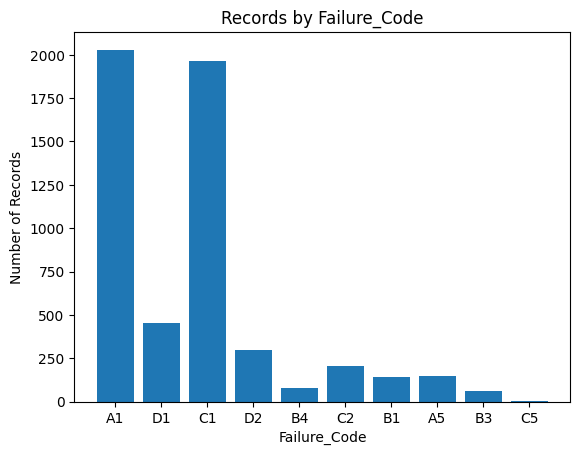

In [33]:
# Looking into number of records by failure code
failureCodeCount = pd.DataFrame({"Failure_Code": [], "Count": []})

failureCodeCount['Failure_Code'] = dataSet['Failure_Code']
failureCodeCount['Count'] = dataSet.groupby('Failure_Code')['Failure_Code'].transform('count')

failureCodeCount = failureCodeCount.drop_duplicates()

plt.bar(failureCodeCount['Failure_Code'], failureCodeCount['Count'])
plt.title('Records by Failure_Code')
plt.xlabel('Failure_Code')
plt.ylabel('Number of Records')
plt.show()

Looking into the distribution of records across various variables, we can see that there might be some other insights that could be explored.
Month shows that there probably isn't too much to look into on if a particular time frame causes more outages than others.
Voltage type shows that some voltages are probably more prone to experience outages than others
Location code shows that some locations have more outages than others so there could be issues with that location, or perhaps they work more with the problematic voltages than other locations.
Failure code shows that some failures are much more common than others.

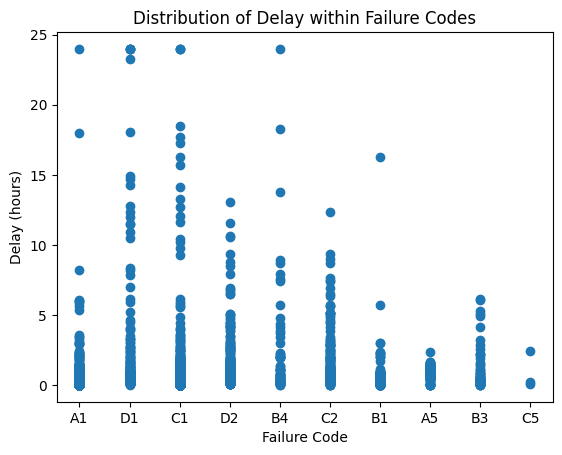

In [34]:
# Seeing if certain failure codes are associated with longer delay times
plt.scatter(dataSet['Failure_Code'], dataSet['Delay_Hours'])  
plt.title('Distribution of Delay within Failure Codes')
plt.xlabel('Failure Code')
plt.ylabel('Delay (hours)')
plt.show() 

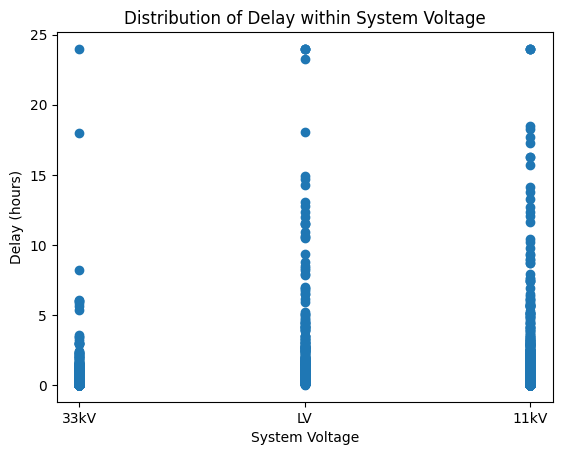

In [35]:
# Seeing if certain voltages are associated with longer delay times
plt.scatter(dataSet['System Voltage'], dataSet['Delay_Hours'])  
plt.title('Distribution of Delay within System Voltage')
plt.xlabel('System Voltage')
plt.ylabel('Delay (hours)')
plt.show() 

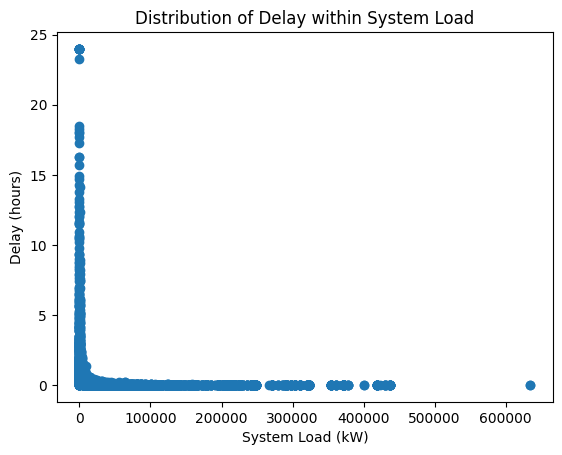

In [41]:
# Seeing if system load is associated with longer delay times
plt.scatter(dataSet['System_Load (kW)'], dataSet['Delay_Hours'])  
plt.title('Distribution of Delay within System Load')
plt.xlabel('System Load (kW)')
plt.ylabel('Delay (hours)')
plt.show() 

Looking at this it does seem like there could be some corelation to explore with failure codes and system voltage. Looking at the system load information though, I don't think I understand what this column is actually reporting though because it doesn't really make sense to me without knowing what it means.

In [49]:
# Convert Categorical to Categories
dataSetCategorized = dataSet

dataSetCategorized['Month'] = dataSetCategorized['Month'].astype('category')
dataSetCategorized['System Voltage'] = dataSetCategorized['System Voltage'].astype('category')
dataSetCategorized['Failure_Code'] = dataSetCategorized['Failure_Code'].astype('category')
dataSetCategorized['Location'] = dataSetCategorized['Location'].astype('category')

In [52]:
# Doing the test/train splitting
X = dataSetCategorized.iloc[:, 1:7].values
y = dataSetCategorized.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 

In [ ]:
# xgb-ing
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

# This doesn't work and I don't have time to spend figuring it out because its now 5 and I don't even have 1 model

ValueError: could not convert string to float: 'January'

In [ ]:
# Trying to encode the data myself since it wasn't working with the stuff above, even though it seems like it should

encodedDataSet = pd.get_dummies(dataSet, columns={['Month'], ['System Variable'], ['Failure_Code'], ['Location']}, drop_first=True, dtype =int)

# Again with this, I didn't have enough time to work with this and try and figure out issues with categorical values 

TypeError: unhashable type: 'list'

In [57]:
# Correlation Matrix 
threshold = -0.4

correlation_matrix = dataSet.corr()

index = correlation_matrix[correlation_matrix['target'], threshold].index


ValueError: could not convert string to float: 'Location 1'

In [38]:
# Model 3

In [39]:
# Cross Validation

Sources

Cross Validation with K Fold:
https://www.geeksforgeeks.org/cross-validation-using-k-fold-with-scikit-learn/

RMSE:
https://www.statology.org/rmse-python/